This script has two tasks:


1.   Display the top three topics with the highest average distribution probability in each year.

*   input file: /content/drive/MyDrive/Colab Notebooks/Masters_Thesis/5_results/topic_modeling/red/red_300_yearly_trend_per_topic.csv
*   output file: tables



2.   Display each topic's trend within 10 years.
*   input file: /content/drive/MyDrive/Colab Notebooks/Masters_Thesis/5_results/topic_modeling/red/red_300_yearly_trend_per_topic.csv
*   output file: graphs



**Note:**
In acknowledgment of the contributions made, portions of this code were developed with the guidance and assistance of ChatGPT.



# Step 0. Read files


In [ ]:
# Convert csv to dictionary
def convert_csv_to_dict(df):
    yearly_avg_topic_probs = {}
    for year in df['year'].unique():
        probs_lists = df[df['year'] == year]['probs'].tolist()
        if probs_lists and isinstance(probs_lists[0], str):
            probs_lists = [eval(probs) for probs in probs_lists]

        yearly_avg_topic_probs[year] = probs_lists[0] if probs_lists else []


    return yearly_avg_topic_probs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval


from google.colab import drive
drive.mount('/content/drive')

# Input path
aca_yearly_trend_path = "/content/drive/MyDrive/Colab Notebooks/Masters_Thesis/5_results/topic_modeling/red/red_300_yearly_trend_per_topic.csv"
# Outout path
aca_top3_each_year_path = "/content/drive/MyDrive/Colab Notebooks/Masters_Thesis/5_results_presentation/topic_modeling/yearly_trend_result_presentation/red_top_3.csv"

# Read files
dataset = pd.read_csv(aca_yearly_trend_path)
# Convert csv to dictionary
yearly_avg_topic_probs = convert_csv_to_dict(dataset)
# Label
topic_to_label = {
    -1: "Noise",
    0: "Energy", 1: "Science Debate", 2: "Climate Change Perspectives",
    3: "Temperature Trend", 4: "Species Extinction", 5: "Sustainable Eating",
    6: "Reforestation", 7: "Greenhouse Gas Effects", 8: "Polar Ice",
    9: "Drought and Precipitation", 10: "Impacts in North America", 11: "Carbon Dioxide Impact",
    12: "Unusual Weather", 13: "Intensifying Wildfire Trends", 14: "Natalism",
    15: "Sea Level Rise", 16: "Methane Impact",
    17: "Political Elections", 18: "18", 19: "Ideology and Climate Change Belief",
    20: "20", 21: "21",
    22: "22", 23: "Mental Health", 24: "24", 25: "Plastic Pollution", 26: "26",
    27: "Data", 28: "28", 29: "29", 30: "30", 31: "31", 32: "32", 33: "Population",
    34: "34", 35: "35", 36: "Covid-19", 37: "Climate Model", 38: "Insects", 39: "39",
    40: "40", 41: "Geoengineering"
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the top 3 topic finding functions

# Step 1. convert the probs column into a list
dataset["probs"] = dataset["probs"].apply(lambda x: literal_eval(x))

# Step 2. find the indices of the top 3 probs in each year
def find_top_indexes_and_values(year_probs):
    """ Find the top 3 topics according to the average probabilities

    Args:
        year_probs (list): one year's prob list

    Returns:
        list: a list including 3 tuples(index, value) descendingly ordered by the probs
    """
    top_three = sorted(enumerate(year_probs), key=lambda x: x[1], reverse=True)[:3]
    return top_three

# Step 3. convert the results of step 2 into a dataframe
def results_to_dataframe(df, topic_to_label):
    """Turn to each year's top 3 info into a dataframe

    Args:
        df (pd.DataFrame): the original DataFrame。
        topic_to_label (dict): index-to-topic-label mapping

    Returns:
        pd.DataFrame: the result DataFrame。
    """
    results = []
    for _, row in df.iterrows():
        year = row["year"]
        top_three = find_top_indexes_and_values(row["probs"])
        top_labels_values = [(topic_to_label[index], value) for index, value in top_three]
        results.append([year] + top_labels_values)

    # create a new df
    result_df = pd.DataFrame(results, columns=["year", "top 1", "top 2", "top 3"])
    result_df["top 1"] = result_df["top 1"].apply(lambda x: f"{x[0]} ({x[1]:.2f})")
    result_df["top 2"] = result_df["top 2"].apply(lambda x: f"{x[0]} ({x[1]:.2f})")
    result_df["top 3"] = result_df["top 3"].apply(lambda x: f"{x[0]} ({x[1]:.2f})")

    return result_df

In [ ]:
# Define display functions
def print_line_graph_for_one_topic(topic_num:int, yearly_avg_topic_probs:dict):
    years = list(yearly_avg_topic_probs.keys())
    topic_probs = [yearly_avg_topic_probs[year][topic_num] for year in years]

    # order the result by year
    years, topic_probs = zip(*sorted(zip(years, topic_probs)))

    # make a line graph
    plt.figure(figsize=(10, 6))
    plt.plot(years, topic_probs, marker="o")
    plt.title(f"Average Probability of Topic {topic_num} {topic_to_label[topic_num]} Over Years")
    plt.xlabel("Year")
    plt.ylabel("Average Probability")
    plt.grid(True)
    plt.xticks(years)
    plt.show()


def print_line_graph_for_multiple_topics(topic_nums:list, yearly_avg_topic_probs:dict):
    plt.figure(figsize=(10, 6))

    # To every topic index
    for topic_num in topic_nums:
        # get the year and its avg probs
        years = list(yearly_avg_topic_probs.keys())
        topic_probs = [yearly_avg_topic_probs[year][topic_num] for year in years]

        # order the result by year
        years, topic_probs = zip(*sorted(zip(years, topic_probs)))

        # create a line graph
        plt.plot(years, topic_probs, marker="o", label=f"Topic {topic_num} {topic_to_label.get(topic_num, 'Unknown')}")

    # title, xlabel, and ylabel
    plt.title("Average Probability of Topics Over Years")
    plt.xlabel("Year")
    plt.ylabel("Average Probability")
    plt.grid(True)
    plt.xticks(years)

    # make the legend right to the graph
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

# Step 1. Display the top three topics with the highest average distribution probability in each year

In [ ]:
# red
result_df = results_to_dataframe(dataset, topic_to_label)
result_df.to_csv(aca_top3_each_year_path)

In [ ]:
result_df

,year,top 1,top 2,top 3
0,2013,Science Debate (0.09),Climate Model (0.03),Data (0.03)
1,2014,Science Debate (0.10),Energy (0.06),Climate Change Perspectives (0.04)
2,2015,Science Debate (0.11),Temperature Trend (0.04),Polar Ice (0.03)
3,2016,Science Debate (0.07),Temperature Trend (0.04),Polar Ice (0.03)
4,2017,Science Debate (0.07),Energy (0.04),Climate Change Perspectives (0.03)
5,2018,Science Debate (0.06),Energy (0.05),Climate Change Perspectives (0.02)
6,2019,Energy (0.05),Science Debate (0.05),Climate Change Perspectives (0.02)
7,2020,Science Debate (0.05),Energy (0.04),Temperature Trend (0.03)
8,2021,Energy (0.05),Science Debate (0.04),Drought and Precipitation (0.02)
9,2022,Energy (0.06),Science Debate (0.05),Species Extinction (0.02)


# Step 2. Present the trend

### Aca

#### Topics 0,1,2,3,4,8,9,27,37

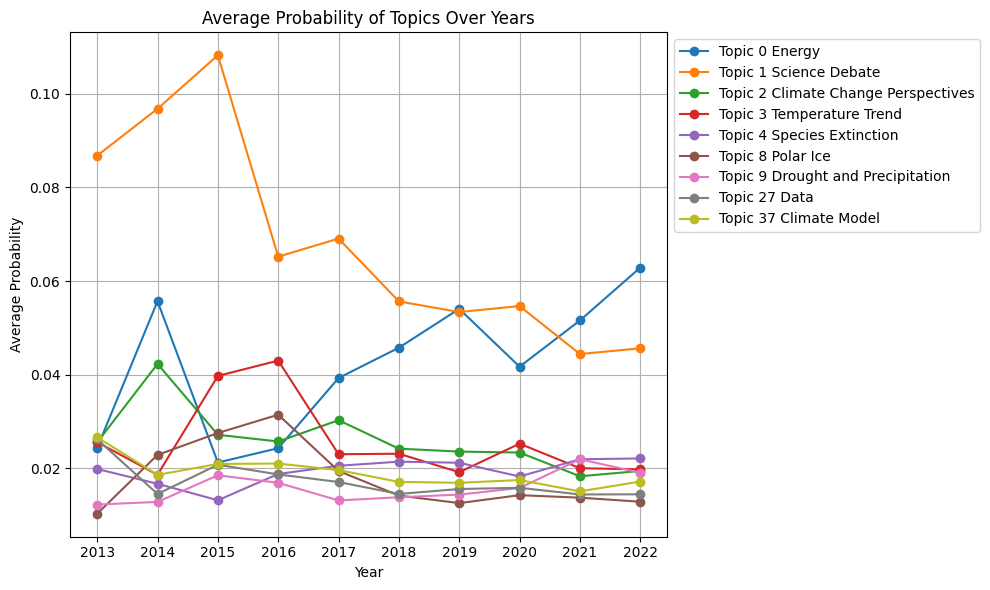

In [ ]:
print_line_graph_for_multiple_topics([0, 1, 2, 3, 4, 8, 9, 27, 37], yearly_avg_topic_probs)